# 卷积神经网络实例（Cifar10）

## Baseline CIFAR10

In [12]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Dense, Activation, BatchNormalization,MaxPool2D
from tensorflow.keras import Model

# Load CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# Baseline model 
class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        # ==============CBAPD模块=======================
        # 卷积层
        # filters: 卷积核个数为6 kernel_size: 卷积核大小为5*5 padding: 边界填充方式为same，使用0填充 
        self.conv1 = Conv2D(filters=6, kernel_size=(5,5), padding='same')
        # BN层 
        # 将数据进行标准化处理，使得数据符合标准正态分布
        self.bn1= BatchNormalization()
        # 激活层
        # 使用relu激活函数
        self.act1 = Activation('relu')
        # 池化层
        # pool_size: 池化核大小为2*2 strides: 步长为2 padding: 边界填充方式为same，使用0填充
        self.pool1 = MaxPooling2D(pool_size=(2,2),strides=2,padding='same')
        # dropout层
        # 随机失活概率为0.2
        self.drop1 = Dropout(0.2)
        # ==============CBAPD模块=======================
        
        # flatten层
        # 将多维数据转化为一维数据
        self.flatten = Flatten()
        # 全连接层
        # 输出维度为128,激活函数为relu
        self.f1 = Dense(128, activation='relu')
        # dropout层 随机失活概率为0.2
        self.drop2 = Dropout(0.2)
        # 全连接层
        # 输出维度为10,激活函数为softmax
        self.f2 = Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.pool1(x)
        x = self.drop1(x)
        
        x = self.flatten(x)
        x = self.f1(x)
        x = self.drop2(x)
        y = self.f2(x)
        return y
        

In [8]:
# 创建模型
model = Baseline()
# 编译模型 定义优化器、损失函数、评价指标
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# 断点续训
checkpoint_save_path = "./checkpoint/Baseline.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

# 定义回调函数
# 保存最优模型 save_best_only=True只保存最优模型 save_weights_only=True只保存模型参数
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)
# 训练模型
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1, callbacks=[cp_callback])

model.summary()

Epoch 1/5


2025-01-06 14:33:37.153563: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 16s 10ms/step - loss: 1.6806 - sparse_categorical_accuracy: 0.3908 - val_loss: 1.4780 - val_sparse_categorical_accuracy: 0.4520
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4282 - sparse_categorical_accuracy: 0.4817 - val_loss: 1.3033 - val_sparse_categorical_accuracy: 0.5322
Epoch 3/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3491 - sparse_categorical_accuracy: 0.5133 - val_loss: 1.2672 - val_sparse_categorical_accuracy: 0.5408
Epoch 4/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2996 - sparse_categorical_accuracy: 0.5310 - val_loss: 1.2496 - val_sparse_categorical_accuracy: 0.5490
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2668 - sparse_categorical_accuracy: 0.5438 - val_loss: 1.2671 - val_sparse_categorical_accuracy: 0.5444
Model: "baseline_1"
_________________________________________________________________
 Layer (t

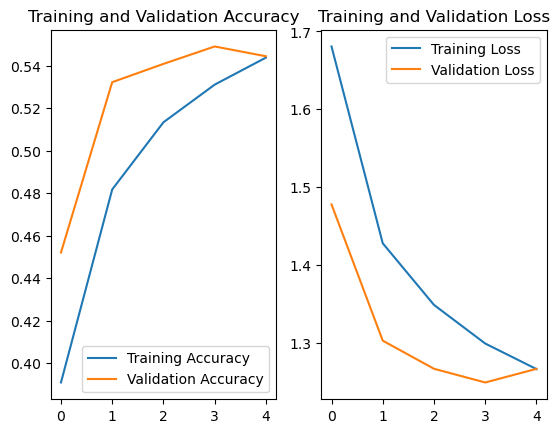

In [9]:
# 记录模型参数
# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 经典卷积网络


如下图所示：
<img src="conv_history.png" w idth="500" height="300" />

## LeNet

- LeNet 是卷积神经网络的早期探索统称，开创了深度学习的先河。

- LeNet-5 是 LeNet 系列中最成功的版本，是现代卷积神经网络的雏形。

- LeNet 只有两层卷积层和三层全连接层，并且没有池化层，没有Dropout层，因此 LeNet-5 模型参数量少，计算量小，训练速度非常快，并且性能也不错。

如下图所示：

<img src="conv_le_net.png" w idth="500" height="300" />·

In [13]:
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        # ==============CBAPD模块=======================
        # 卷积层 filters: 卷积核个数为6 kernel_size: 卷积核大小为5*5 activation: 激活函数为sigmoid 
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), activation='sigmoid')
        # 池化层 pool_size: 池化核大小为2*2 strides: 步长为2
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2)
        self.c2 = Conv2D(filters=16, kernel_size=(5, 5), activation='sigmoid')
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2)
        # ==============CBAPD模块=======================
        
        self.flatten = Flatten()
        # 全连接层
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(10, activation='softmax')
    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)
        x = self.c2(x)
        x = self.p2(x)
        
        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y

        

Epoch 1/5
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0209 - sparse_categorical_accuracy: 0.2402 - val_loss: 1.7737 - val_sparse_categorical_accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7140 - sparse_categorical_accuracy: 0.3689 - val_loss: 1.6235 - val_sparse_categorical_accuracy: 0.4011
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5949 - sparse_categorical_accuracy: 0.4125 - val_loss: 1.5846 - val_sparse_categorical_accuracy: 0.4199
Epoch 4/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5079 - sparse_categorical_accuracy: 0.4480 - val_loss: 1.4645 - val_sparse_categorical_accuracy: 0.4542
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4527 - sparse_categorical_accuracy: 0.4695 - val_loss: 1.4227 - val_sparse_categorical_accuracy: 0.4830
Model: "le_net5_1"
_________________________________________________________________
 La

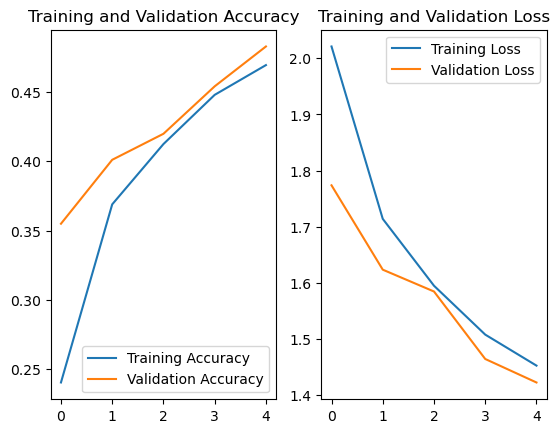

In [14]:
# 创建模型
model = LeNet5()
# 编译模型 定义优化器、损失函数、评价指标
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# 断点续训
checkpoint_save_path = "./checkpoint/LeNet5.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

# 定义回调函数
# 保存最优模型 save_best_only=True只保存最优模型 save_weights_only=True只保存模型参数
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)
# 训练模型
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1, callbacks=[cp_callback])

model.summary()

# 记录模型参数
# print(model.trainable_variables)
file = open('./weights_le_net5.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()